# Assignment 1 - Data Collection & Preparation
Katesopon Kunpanperng 60070127

# Task 1 : Pulling data from api

import library that involve in access api and get data

In [4]:
import json
import urllib.request
from pandas.io.json import json_normalize

In [5]:
api_key = "58a0c61c5d5020bab18e484ae251c19e"

In [6]:
# this is api called function (using api to get the data)
def readjson(x):
    url = "https://api.themoviedb.org/3/discover/movie?api_key="+ api_key +"&language=en-US&sort_by=popularity.desc&include_adult=false&include_video=false&page="+str(x)
    response = urllib.request.urlopen(url)
    raw_json = response.read().decode("utf-8")
    data_out = json.loads(raw_json)
    # because data that get from this api is kinda messing so I'm gonna get the data only from "results" array
    return data_out['results']

In [7]:
# normalize the data that got from api
movies = json_normalize(readjson(1))
# because of this the data that i got it only from page 1 of the webpage

In [8]:
movies.head()

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/p15fLYp0X04mS8cbHVj7mZ6PBBE.jpg,"[35, 27]",474350,en,It Chapter Two,27 years after overcoming the malevolent super...,442.401,/zfE0R94v1E8cuKAerbskfD3VfUt.jpg,2019-09-06,It Chapter Two,False,7.2,283
1,False,/6X2YjjYcs8XyZRDmJAHNDlls7L4.jpg,"[35, 80, 18]",429203,en,The Old Man & the Gun,"The true story of Forrest Tucker, from his aud...",247.416,/a4BfxRK8dBgbQqbRxPs8kmLd8LG.jpg,2018-09-28,The Old Man & the Gun,False,6.3,498
2,False,/phxiKFDvPeQj4AbkvJLmuZEieDU.jpg,"[28, 12, 878]",320288,en,Dark Phoenix,The X-Men face their most formidable and power...,179.504,/cCTJPelKGLhALq3r51A9uMonxKj.jpg,2019-06-07,Dark Phoenix,False,6.1,1675
3,False,/hpgda6P9GutvdkDX5MUJ92QG9aj.jpg,[28],384018,en,Fast & Furious Presents: Hobbs & Shaw,"A spinoff of The Fate of the Furious, focusing...",124.178,/keym7MPn1icW1wWfzMnW3HeuzWU.jpg,2019-08-02,Fast & Furious Presents: Hobbs & Shaw,False,6.5,1028
4,False,/k2WyDw2NTUIWnuEs5gT7wgrCQg6.jpg,[28],423204,en,Angel Has Fallen,Secret Service Agent Mike Banning is framed fo...,149.039,/fapXd3v9qTcNBTm39ZC4KUVQDNf.jpg,2019-08-23,Angel Has Fallen,False,5.7,276


# More data ! and clean out some column that I dont want

I will write the for loop that use to append the output from "readjson" into df dataframe
because 1 page only contain 20 movies
but in process of getting data from api I've tried to pull it using for loop for 500 pages but html 422 error occured so I guess I need to import time to wiat to start the next time pulling

In [9]:
import time

In [10]:
# for loop for pulling data from api 
# I'm gonna make it more statistic so I'm gonna do the systematic sampling the data by 3 pages
for i in range(0, 500, 3):
        if i > 1:
            movies = movies.append(readjson(i), ignore_index=True)
            time.sleep(1)
            # this for loop purpose is to only append the rows to dataframe
            # it wont check if the pages is already exist

In [11]:
movies

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/p15fLYp0X04mS8cbHVj7mZ6PBBE.jpg,"[35, 27]",474350,en,It Chapter Two,27 years after overcoming the malevolent super...,442.401,/zfE0R94v1E8cuKAerbskfD3VfUt.jpg,2019-09-06,It Chapter Two,False,7.2,283
1,False,/6X2YjjYcs8XyZRDmJAHNDlls7L4.jpg,"[35, 80, 18]",429203,en,The Old Man & the Gun,"The true story of Forrest Tucker, from his aud...",247.416,/a4BfxRK8dBgbQqbRxPs8kmLd8LG.jpg,2018-09-28,The Old Man & the Gun,False,6.3,498
2,False,/phxiKFDvPeQj4AbkvJLmuZEieDU.jpg,"[28, 12, 878]",320288,en,Dark Phoenix,The X-Men face their most formidable and power...,179.504,/cCTJPelKGLhALq3r51A9uMonxKj.jpg,2019-06-07,Dark Phoenix,False,6.1,1675
3,False,/hpgda6P9GutvdkDX5MUJ92QG9aj.jpg,[28],384018,en,Fast & Furious Presents: Hobbs & Shaw,"A spinoff of The Fate of the Furious, focusing...",124.178,/keym7MPn1icW1wWfzMnW3HeuzWU.jpg,2019-08-02,Fast & Furious Presents: Hobbs & Shaw,False,6.5,1028
4,False,/k2WyDw2NTUIWnuEs5gT7wgrCQg6.jpg,[28],423204,en,Angel Has Fallen,Secret Service Agent Mike Banning is framed fo...,149.039,/fapXd3v9qTcNBTm39ZC4KUVQDNf.jpg,2019-08-23,Angel Has Fallen,False,5.7,276
5,False,/1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg,"[28, 12, 16, 18, 10751]",420818,en,The Lion King,"Simba idolises his father, King Mufasa, and ta...",124.906,/2bXbqYdUdNVa8VIWXVfclP2ICtT.jpg,2019-07-19,The Lion King,False,7.2,2366
6,False,/stemLQMLDrlpfIlZ5OjllOPT8QX.jpg,"[28, 80, 53]",458156,en,John Wick: Chapter 3 – Parabellum,Super-assassin John Wick returns with a $14 mi...,143.032,/ziEuG1essDuWuC5lpWUaw1uXY2O.jpg,2019-05-17,John Wick: Chapter 3 – Parabellum,False,7.1,2377
7,False,/a1MlbLBk5Sy6YvMbSuKfwGlDVlb.jpg,"[12, 16, 35, 10751]",920,en,Cars,"Lightning McQueen, a hotshot rookie race car d...",95.760,/jpfkzbIXgKZqCZAkEkFH2VYF63s.jpg,2006-06-09,Cars,False,6.7,8027
8,False,/5myQbDzw3l8K9yofUXRJ4UTVgam.jpg,"[28, 12, 878]",429617,en,Spider-Man: Far from Home,Peter Parker and his friends go on a summer tr...,182.251,/lcq8dVxeeOqHvvgcte707K0KVx5.jpg,2019-07-02,Spider-Man: Far from Home,False,7.7,3369
9,False,/o0XitoLDYFGbql60Fnd0xXJQdDP.jpg,"[12, 35, 14, 10749, 10751]",420817,en,Aladdin,A kindhearted street urchin named Aladdin emba...,121.081,/yYWGCAerbVAHyfuGBCHKzWJdEtj.jpg,2019-05-24,Aladdin,False,7.1,3177


In [12]:
# get rid of column that im not interested in
movies = movies.drop(columns=['backdrop_path','overview','poster_path'])
movies.head()
# now im get rid of the data i dont want(maybe more next time)

,adult,genre_ids,id,original_language,original_title,popularity,release_date,title,video,vote_average,vote_count
0,False,"[35, 27]",474350,en,It Chapter Two,442.401,2019-09-06,It Chapter Two,False,7.2,283
1,False,"[35, 80, 18]",429203,en,The Old Man & the Gun,247.416,2018-09-28,The Old Man & the Gun,False,6.3,498
2,False,"[28, 12, 878]",320288,en,Dark Phoenix,179.504,2019-06-07,Dark Phoenix,False,6.1,1675
3,False,[28],384018,en,Fast & Furious Presents: Hobbs & Shaw,124.178,2019-08-02,Fast & Furious Presents: Hobbs & Shaw,False,6.5,1028
4,False,[28],423204,en,Angel Has Fallen,149.039,2019-08-23,Angel Has Fallen,False,5.7,276


In [13]:
# check if there's are any null values in dataframe
movies.isnull().sum()

adult                0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         1
title                0
video                0
vote_average         0
vote_count           0
dtype: int64

In [16]:
# get rid of null values in release date
movies = movies.dropna()
movies.isnull().sum()

adult                0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
video                0
vote_average         0
vote_count           0
dtype: int64

In [17]:
movies.head()

,adult,genre_ids,id,original_language,original_title,popularity,release_date,title,video,vote_average,vote_count
0,False,"[35, 27]",474350,en,It Chapter Two,442.401,2019-09-06,It Chapter Two,False,7.2,283
1,False,"[35, 80, 18]",429203,en,The Old Man & the Gun,247.416,2018-09-28,The Old Man & the Gun,False,6.3,498
2,False,"[28, 12, 878]",320288,en,Dark Phoenix,179.504,2019-06-07,Dark Phoenix,False,6.1,1675
3,False,[28],384018,en,Fast & Furious Presents: Hobbs & Shaw,124.178,2019-08-02,Fast & Furious Presents: Hobbs & Shaw,False,6.5,1028
4,False,[28],423204,en,Angel Has Fallen,149.039,2019-08-23,Angel Has Fallen,False,5.7,276


# Task 2 : Data Preparation 
(a little bit preapare)

In [18]:
import pandas as pd

Change release_date into date time data type first (for better future)

In [19]:
movies['release_date'] = pd.to_datetime(movies['release_date'])

In [20]:
movies.dtypes

adult                          bool
genre_ids                    object
id                            int64
original_language            object
original_title               object
popularity                  float64
release_date         datetime64[ns]
title                        object
video                          bool
vote_average                float64
vote_count                    int64
dtype: object

In [21]:
movies.head()

,adult,genre_ids,id,original_language,original_title,popularity,release_date,title,video,vote_average,vote_count
0,False,"[35, 27]",474350,en,It Chapter Two,442.401,2019-09-06,It Chapter Two,False,7.2,283
1,False,"[35, 80, 18]",429203,en,The Old Man & the Gun,247.416,2018-09-28,The Old Man & the Gun,False,6.3,498
2,False,"[28, 12, 878]",320288,en,Dark Phoenix,179.504,2019-06-07,Dark Phoenix,False,6.1,1675
3,False,[28],384018,en,Fast & Furious Presents: Hobbs & Shaw,124.178,2019-08-02,Fast & Furious Presents: Hobbs & Shaw,False,6.5,1028
4,False,[28],423204,en,Angel Has Fallen,149.039,2019-08-23,Angel Has Fallen,False,5.7,276


I want to know that what each genre_id is

In [22]:
# it an api code to get genre data from web
import http.client

conn = http.client.HTTPSConnection("api.themoviedb.org")

payload = "{}"

conn.request("GET", "/3/genre/movie/list?language=en-US&api_key=58a0c61c5d5020bab18e484ae251c19e", payload)

res = conn.getresponse()
genre_data = res.read()

In [23]:
# get genre values which have id
genre_data

b'{"genres":[{"id":28,"name":"Action"},{"id":12,"name":"Adventure"},{"id":16,"name":"Animation"},{"id":35,"name":"Comedy"},{"id":80,"name":"Crime"},{"id":99,"name":"Documentary"},{"id":18,"name":"Drama"},{"id":10751,"name":"Family"},{"id":14,"name":"Fantasy"},{"id":36,"name":"History"},{"id":27,"name":"Horror"},{"id":10402,"name":"Music"},{"id":9648,"name":"Mystery"},{"id":10749,"name":"Romance"},{"id":878,"name":"Science Fiction"},{"id":10770,"name":"TV Movie"},{"id":53,"name":"Thriller"},{"id":10752,"name":"War"},{"id":37,"name":"Western"}]}'

In [24]:
genre_data = json.loads(genre_data)
gen_data = json_normalize(genre_data['genres'])

# gen_data = gen_data.set_index('id')
gen_data.head()

,id,name
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime


Saving Genre data file before set it index

In [25]:
gen_data.to_csv('data\genre_data.csv')

In [26]:
# set index by id for easy access
gen_data = gen_data.set_index('id')
gen_data.index

Int64Index([   28,    12,    16,    35,    80,    99,    18, 10751,    14,
               36,    27, 10402,  9648, 10749,   878, 10770,    53, 10752,
               37],
           dtype='int64', name='id')

In [27]:
gen_data.head()

,name
id,
28,Action
12,Adventure
16,Animation
35,Comedy
80,Crime


In [28]:
# back up testting code
# back = movies
# back.head()

In [29]:
for i in movies['genre_ids']:
    for j in range(len(i)):
        i[j] = gen_data['name'][i[j]]

In [32]:
movies.tail()

,adult,genre_ids,id,original_language,original_title,popularity,release_date,title,video,vote_average,vote_count
3335,False,[Drama],14134,hi,मैं हूँ ना,7.472,2004-04-30,Main Hoon Na,False,7.0,118
3336,False,"[Drama, Fantasy]",621723,el,Entwined,5.437,2019-09-06,Entwined,False,0.0,0
3337,False,"[Drama, Comedy]",33806,nl,De helaasheid der dingen,6.782,2009-10-07,The Misfortunates,False,7.5,89
3338,False,"[Animation, Comedy]",75491,fr,Le Chat du rabbin,6.573,2012-12-14,The Rabbi's Cat,False,6.8,88
3339,False,[Thriller],2761,en,Secret Agent,5.509,1936-06-12,Secret Agent,False,6.5,54


Now I get my full set of data, 
It's a time to save file to csv

In [33]:
# save to csv file
movies.to_csv('data\movies_data.csv')

# Task 3 : Data Analyze and Summarise

Do the descriptive statistics

In [34]:
# I guess for me right now I don't need id column
movies = movies.drop(columns='id')
movies.head()

,adult,genre_ids,original_language,original_title,popularity,release_date,title,video,vote_average,vote_count
0,False,"[Comedy, Horror]",en,It Chapter Two,442.401,2019-09-06,It Chapter Two,False,7.2,283
1,False,"[Comedy, Crime, Drama]",en,The Old Man & the Gun,247.416,2018-09-28,The Old Man & the Gun,False,6.3,498
2,False,"[Action, Adventure, Science Fiction]",en,Dark Phoenix,179.504,2019-06-07,Dark Phoenix,False,6.1,1675
3,False,[Action],en,Fast & Furious Presents: Hobbs & Shaw,124.178,2019-08-02,Fast & Furious Presents: Hobbs & Shaw,False,6.5,1028
4,False,[Action],en,Angel Has Fallen,149.039,2019-08-23,Angel Has Fallen,False,5.7,276


In [35]:
# Descriptive Statistics
print("Data Columns:"+"\n"+ str(movies.columns)+"\n") 
movies.describe()

Data Columns:
Index(['adult', 'genre_ids', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'video', 'vote_average',
       'vote_count'],
      dtype='object')



,popularity,vote_average,vote_count
count,3339.000000,3339.000000,3339.000000
mean,10.234247,6.309434,926.140461
std,12.564434,1.340519,1872.154795
min,2.557000,0.000000,0.000000
25%,6.844500,5.800000,132.000000
50%,8.190000,6.500000,291.000000
75%,10.431500,7.100000,791.500000
max,442.401000,10.000000,23096.000000


oops look up there(descriptive statistic)
1. Why vote_count got too much sd ?
2. Why vote average and vote count got minimum at zero ?

In [36]:
# let see the data that I just talk about(min = 0 & so much sd)
movies.loc[movies.vote_average == 0].head()

# wanna see full data ? take .head() out

,adult,genre_ids,original_language,original_title,popularity,release_date,title,video,vote_average,vote_count
34,False,"[Action, Adventure, Crime, Science Fiction]",ja,ルパンレンジャーＶＳパトレンジャーＶＳキュウレンジャー,34.504,2019-05-03,Lupinranger VS Patranger VS Kyuranger,False,0.0,0
86,False,"[Crime, Drama]",ko,타짜: 원 아이드 잭,19.407,2019-09-11,Tazza: One Eyed Jack,False,0.0,0
122,False,"[Crime, Drama]",es,Chicuarotes,10.710,2019-09-10,Chicuarotes,False,0.0,12
133,False,"[Fantasy, Horror, Thriller]",en,Mayday,10.298,2019-09-10,Mayday,False,0.0,0
138,False,[Drama],en,Human Capital,9.097,2019-09-10,Human Capital,False,0.0,1


In [37]:
# Take a look at vote average
movies.loc[movies.vote_count <= 60].count()

adult                266
genre_ids            266
original_language    266
original_title       266
popularity           266
release_date         266
title                266
video                266
vote_average         266
vote_count           266
dtype: int64

As you can see I think there are some movies had not been categorize, still not release or even don't publish the video yet (some of them  don't have genre too) So I think this data should be drop because I don't want to mess with some movies that not publish yet

In [38]:
# when I revision the data by using describe I saw min and 0 of the vote_count data
# vote_count data told that how many vote that movie got and there's too much difference between min and first quartile

So now I will wrote the function to detect and get rid of outliers

In [41]:
import numpy as np

In [42]:
# I'm finding outliers using Inter Quartile Range
# input is data column
def iqr_out(dataset):
    sorted(dataset)
    q1, q3= np.percentile(dataset,[25,75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr) 
    upper_bound = q3 + (1.5 * iqr)
    return ("lower_bound is:", lower_bound,"upper_bound is:", upper_bound)

In [43]:
iqr_out(movies['vote_count'])

('lower_bound is:', -857.25, 'upper_bound is:', 1780.75)

In [44]:
# So I guess I cannot use the IQR way because the lower_bound is too low
# So I will use the Z-Score approach
outliers=[]

In [45]:
# input is data column
def detect_outlier(dataset):
    threshold = 3
    d_mean = np.mean(dataset)
    d_std = np.std(dataset)
    for x in dataset:
        z_score = (x - d_mean) / d_std 
        if np.abs(z_score) > threshold:
            outliers.append(x)
    return outliers

In [46]:
print(detect_outlier(movies['vote_count']))

[8027, 9296, 10769, 15161, 15139, 13277, 23096, 18729, 12468, 14619, 19464, 12135, 8504, 14429, 6916, 10469, 16071, 13181, 11023, 10397, 6928, 7632, 8855, 12629, 7024, 12658, 7737, 14904, 11391, 10878, 10940, 11224, 8280, 7162, 7319, 9503, 9305, 8988, 6956, 7618, 13040, 8106, 8903, 11106, 9060, 6663, 7977, 12699, 9969, 11059, 14470, 8628, 8667, 9653, 7050, 12880, 8205, 6701, 7533, 11603, 10185, 10665, 10717, 8757, 7923, 9398, 13422, 9938, 7870, 7597, 10192, 7591, 14095, 7058, 7024, 7745, 7946, 7783, 6919, 6654, 11630, 6565, 7530, 7917]


# ok

after I try too much approach in get rid of outlier I guess I will just make the minimum gate and then get rid of data that below the minimum

In [47]:
vote_min = 50
movies = movies.loc[movies.vote_count >= vote_min]
movies.describe()
# no messing with vote_count std now because I just set the minimum of it
# and I will use median instead of mean as a central tendency

,popularity,vote_average,vote_count
count,3109.000000,3109.000000,3109.000000
mean,10.123132,6.474397,993.629784
std,12.468460,0.895445,1923.064281
min,4.031000,1.800000,50.000000
25%,6.891000,5.900000,154.000000
50%,8.198000,6.500000,328.000000
75%,10.285000,7.100000,862.000000
max,442.401000,8.600000,23096.000000


In [57]:
movies['genre_ids'].count()

3109

# Task 4 : Question and Visualizations

In [60]:
# import library
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
sns.set(style='ticks', palette='Set1')

In [56]:
movies.head()

,adult,genre_ids,original_language,original_title,popularity,release_date,title,video,vote_average,vote_count
0,False,"[Comedy, Horror]",en,It Chapter Two,442.401,2019-09-06,It Chapter Two,False,7.2,283
1,False,"[Comedy, Crime, Drama]",en,The Old Man & the Gun,247.416,2018-09-28,The Old Man & the Gun,False,6.3,498
2,False,"[Action, Adventure, Science Fiction]",en,Dark Phoenix,179.504,2019-06-07,Dark Phoenix,False,6.1,1675
3,False,[Action],en,Fast & Furious Presents: Hobbs & Shaw,124.178,2019-08-02,Fast & Furious Presents: Hobbs & Shaw,False,6.5,1028
4,False,[Action],en,Angel Has Fallen,149.039,2019-08-23,Angel Has Fallen,False,5.7,276


# From 2010 to 2018 which year have most movies release

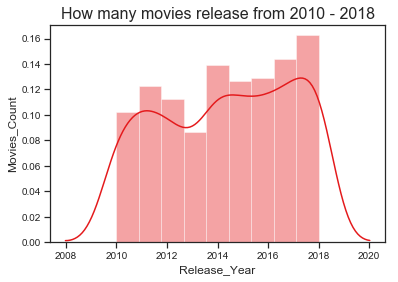

In [100]:
x_1 = movies.loc[(movies.release_date.dt.year >= 2010) & (movies.release_date.dt.year < 2019)]
g_1 = sns.distplot(x_1.release_date.dt.year, kde = True)
g_1.axes.set_title("How many movies release from 2010 - 2018",fontsize=16)
g_1.set_xlabel("Release_Year",fontsize=12)
g_1.set_ylabel("Movies_Count",fontsize=12)
g_1.tick_params(labelsize=10)

# Which language(original title) have most average rating(vote_average) from more than 20 movies

In [103]:
movies.count()

adult                3109
genre_ids            3109
original_language    3109
original_title       3109
popularity           3109
release_date         3109
title                3109
video                3109
vote_average         3109
vote_count           3109
dtype: int64

In [107]:
movies.groupby('original_language').count()

,adult,genre_ids,original_title,popularity,release_date,title,video,vote_average,vote_count
original_language,,,,,,,,,
ar,1,1,1,1,1,1,1,1,1
cs,2,2,2,2,2,2,2,2,2
da,10,10,10,10,10,10,10,10,10
de,39,39,39,39,39,39,39,39,39
el,4,4,4,4,4,4,4,4,4
en,2544,2544,2544,2544,2544,2544,2544,2544,2544
es,44,44,44,44,44,44,44,44,44
fi,2,2,2,2,2,2,2,2,2
fr,151,151,151,151,151,151,151,151,151


In [ ]:
df.sort_values(by=['col1'])